code模式切换为markdown模式：ESC+M
markdown模式切换到code模式：ESC+Y

# 文本分类实例

## step1 导入相关包

In [1]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

###  step2 加载数据

In [6]:
import pandas as pd

data = pd.read_csv("./ChnSentiCorp_htl_all.csv")
data.head()
data

,label,review
0,1,"距离川沙公路较近,但是公交指示不对,如果是""蔡陆线""的话,会非常麻烦.建议用别的路线.房间较..."
1,1,商务大床房，房间很大，床有2M宽，整体感觉经济实惠不错!
2,1,早餐太差，无论去多少人，那边也不加食品的。酒店应该重视一下这个问题了。房间本身很好。
3,1,宾馆在小街道上，不大好找，但还好北京热心同胞很多~宾馆设施跟介绍的差不多，房间很小，确实挺小...
4,1,"CBD中心,周围没什么店铺,说5星有点勉强.不知道为什么卫生间没有电吹风"
...,...,...
7761,0,尼斯酒店的几大特点：噪音大、环境差、配置低、服务效率低。如：1、隔壁歌厅的声音闹至午夜3点许...
7762,0,盐城来了很多次，第一次住盐阜宾馆，我的确很失望整个墙壁黑咕隆咚的，好像被烟熏过一样家具非常的...
7763,0,看照片觉得还挺不错的，又是4星级的，但入住以后除了后悔没有别的，房间挺大但空空的，早餐是有但...
7764,0,我们去盐城的时候那里的最低气温只有4度，晚上冷得要死，居然还不开空调，投诉到酒店客房部，得到...


In [5]:
data = data.dropna()
data

,label,review
0,1,"距离川沙公路较近,但是公交指示不对,如果是""蔡陆线""的话,会非常麻烦.建议用别的路线.房间较..."
1,1,商务大床房，房间很大，床有2M宽，整体感觉经济实惠不错!
2,1,早餐太差，无论去多少人，那边也不加食品的。酒店应该重视一下这个问题了。房间本身很好。
3,1,宾馆在小街道上，不大好找，但还好北京热心同胞很多~宾馆设施跟介绍的差不多，房间很小，确实挺小...
4,1,"CBD中心,周围没什么店铺,说5星有点勉强.不知道为什么卫生间没有电吹风"
...,...,...
7761,0,尼斯酒店的几大特点：噪音大、环境差、配置低、服务效率低。如：1、隔壁歌厅的声音闹至午夜3点许...
7762,0,盐城来了很多次，第一次住盐阜宾馆，我的确很失望整个墙壁黑咕隆咚的，好像被烟熏过一样家具非常的...
7763,0,看照片觉得还挺不错的，又是4星级的，但入住以后除了后悔没有别的，房间挺大但空空的，早餐是有但...
7764,0,我们去盐城的时候那里的最低气温只有4度，晚上冷得要死，居然还不开空调，投诉到酒店客房部，得到...


### step3 创建dataset

In [10]:

from torch.utils.data import Dataset

class MyDataset(Dataset):
    def __init__(self):
        super().__init__()
        self.data = pd.read_csv("./ChnSentiCorp_htl_all.csv").dropna()

    def __getitem__(self, index):
        return self.data.iloc[index]['review'], self.data.iloc[index]['label']

    def __len__(self):
        return len(self.data)
        

In [11]:
dataset = MyDataset()
for i in range(5):
    print(dataset[i])

('距离川沙公路较近,但是公交指示不对,如果是"蔡陆线"的话,会非常麻烦.建议用别的路线.房间较为简单.', 1)
('商务大床房，房间很大，床有2M宽，整体感觉经济实惠不错!', 1)
('早餐太差，无论去多少人，那边也不加食品的。酒店应该重视一下这个问题了。房间本身很好。', 1)
('宾馆在小街道上，不大好找，但还好北京热心同胞很多~宾馆设施跟介绍的差不多，房间很小，确实挺小，但加上低价位因素，还是无超所值的；环境不错，就在小胡同内，安静整洁，暖气好足-_-||。。。呵还有一大优势就是从宾馆出发，步行不到十分钟就可以到梅兰芳故居等等，京味小胡同，北海距离好近呢。总之，不错。推荐给节约消费的自助游朋友~比较划算，附近特色小吃很多~', 1)
('CBD中心,周围没什么店铺,说5星有点勉强.不知道为什么卫生间没有电吹风', 1)


### step4 划分数据集

In [12]:
from torch.utils.data import random_split
trainset, validset = random_split(dataset, lengths=[0.9, 0.1])
len(trainset), len(validset)

(6989, 776)

In [13]:
for i in range(10):
    print(trainset[i])

('一个字――满意，在烟台住过几家酒店，这里的服务最好提前联系酒店希望他们能到机场接我，总台小姐一口答应，我晚上8点多到烟台，车已经等着我了。到了酒店，问司机接机费多少钱时，竟然告诉我是免费的！！！他们有免费机场接送服务，第一次听说这种服务，不错，好像打车要40多块呀注意到酒店设有机场售票处，3分钟搞定机票，方便！总之，很好的酒店！肯定会常住', 1)
('周边环境很静,离天门山和机场不远,有接机服务也很方便.出行周边逛就很不方便了,离闹区很远.房间比较小,脏和旧,床单也不怎么干净,冷水壶底下金属有脱落发霉,不敢使用,连放冷水的也有沉淀杂质,没敢喝,淋浴房容易漏水使地板变得很湿.早餐不怎么好,餐厅象个体户开的大众食堂,卫生条件不好.看到综合评分感觉有点上当.', 0)
('酒店硬件条件不错，服务也挺好，价格合适。只是当地风俗让我们有点受不了，晚上酒店有新人结婚，乐队一直在大门外演奏，异常吵闹。本来酒店身处安静之地的优点被全部破坏了。', 1)
('搂里有个鸭王烤鸭，地段好，在徐家汇地区，这个地段价格还可以的酒店也就这家了。补充点评2008年4月1日：我们找了下这个价位的，这个地段的，没找出第二家。没竞争。唯一的天平宾馆，也是比不上它的地段。', 1)
('替朋友多次订过该酒店，挺不错的，唯一就是停车不方便，从青年大街进入停车场以及从停车场驶入青年大街都不太便利。', 1)
('位置比较好，但条件一般，居然空调是单冷的，前台服务非常冷淡', 0)
('环境很美，服务很好。但房间装修一般，入住时感觉房间很潮，酒店内吃饭的地方太少。', 1)
('太令人失望了。通过携程预定的，应含双早，可是，总台没给餐券，餐厅要收每人10元，才上餐。浴室的龙头坏的，头天入住报修后，到第二天退房也没人修。浴帘脏得看不出本来的颜色。太差劲了。', 0)
('宾馆新装修过，房间很干净，各种设施都完好。早餐品种较多，可选择余地较大。特别是服务人员的态度非常热情，无论走到哪里，服务人员都会主动问候，回答询问也十分细致详尽。宾馆里客运站极近，很方便。', 1)
('首先我希望说的是请大家不要上当.我7月22号入住,订的是所谓的特色豪华房.给了我一个二楼的房间,但一进门吓一跳！离窗户不到一米（不夸张）是商业街的商铺后面，存放的全是垃圾一类的东西，我简直不敢相信这样的房间可以给客人住，最主要的是对面的人

### step5 创建dataloader
让数据以batch的形式返回

In [37]:
import torch
tokenizer = AutoTokenizer.from_pretrained("hfl/rbt3")

def collate_func(batch):
    inputs, labels = [], []
    for item in batch:
        inputs.append(item[0])
        labels.append(item[1])
    inputs = tokenizer(inputs, max_length=128, padding="max_length", truncation=True, return_tensors='pt')
    labels = torch.tensor(labels)
    inputs['labels'] = labels
    return inputs


In [38]:
from torch.utils.data import DataLoader

trainloader = DataLoader(trainset, batch_size=32, shuffle=True, collate_fn=collate_func)
validloader = DataLoader(validset, batch_size=64, shuffle=False, collate_fn=collate_func)  # 验证集的batch可以设置大一些，因为不需要做梯度操作，所以显存暂用更小


In [39]:
next(enumerate(trainloader))[1]

{'input_ids': tensor([[ 101,  671, 2157,  ..., 3300,  671,  102],
        [ 101, 1398, 2562,  ..., 6825,  702,  102],
        [ 101, 6821, 3613,  ...,  117, 1071,  102],
        ...,
        [ 101, 2218, 1762,  ...,    0,    0,    0],
        [ 101, 4384, 1862,  ...,    0,    0,    0],
        [ 101,  769, 6858,  ...,    0,    0,    0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'labels': tensor([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
        0, 1, 0, 1, 0, 0, 1, 1])}

### step6 创建模型及优化器

In [51]:
from torch.optim import Adam

model = AutoModelForSequenceClassification.from_pretrained("hfl/rbt3")
if torch.cuda.is_available():
    model = model.cuda()
optimizer = Adam(model.parameters(), lr=2e-5)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at hfl/rbt3 and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


### step7 训练与验证

In [52]:
def evaluate():
    model.eval()
    acc_num = 0
    with torch.inference_mode():
        for batch in validloader:
            if torch.cuda.is_available():
                batch = {k: v.cuda() for k, v in batch.items()}
            output = model(**batch)
            pred = torch.argmax(output.logits, dim=-1)
            acc_num += (pred.long() == batch['labels'].long()).float().sum()
    return acc_num / len(validset)


def train(epoch=3, log_step=100):
    global_step = 0
    for ep in range(epoch):
        model.train()
        for batch in trainloader:
            if torch.cuda.is_available():
                batch = {k: v.cuda() for k, v in batch.items()}
            optimizer.zero_grad()
            output = model(**batch)
            output.loss.backward()
            optimizer.step()
            if global_step % log_step == 0:
                print(f"ep: {ep}, global_step: {global_step}, loss: {output.loss.item()}")
            global_step += 1
        acc = evaluate()
        print(f"ep: {ep}, acc: {acc}")
            


### step8 模型训练

In [53]:
train()

ep: 0, global_step: 0, loss: 0.6731939911842346
ep: 0, global_step: 100, loss: 0.41207706928253174
ep: 0, global_step: 200, loss: 0.22846296429634094
ep: 0, acc: 0.8775773048400879
ep: 1, global_step: 300, loss: 0.2565557062625885
ep: 1, global_step: 400, loss: 0.08725530654191971
ep: 1, acc: 0.8827319741249084
ep: 2, global_step: 500, loss: 0.09058311581611633
ep: 2, global_step: 600, loss: 0.15378338098526
ep: 2, acc: 0.8981958627700806


### step6 模型预测

In [56]:
sen = "我觉得这家酒店的菜不错， 饭很好吃！"
id2_label = {0:"差评！", 1: "好评！"}
model.eval()
with torch.inference_mode():
    inputs = tokenizer(sen, max_length=128, padding="max_length", truncation=True, return_tensors='pt')
    if torch.cuda.is_available():
        inputs = {k: v.cuda() for k, v in inputs.items()}
    logits = model(**inputs).logits
    pred = torch.argmax(logits, dim=-1)
    print(f"输入：{sen}\n模型预测结果： {id2_label.get(pred.item())}")


输入：我觉得这家酒店的菜不错， 饭很好吃！
模型预测结果： 好评！


In [66]:
# 比较快速方便的方法
from transformers import pipeline
id2label = {0:"差评！", 1: "好评！"}
model.config.id2label = id2label
pipe = pipeline("text-classification", model=model, tokenizer=tokenizer)
pipe(sen)

[{'label': '好评！', 'score': 0.9962211847305298}]

[{'label': '好评！', 'score': 0.9962211847305298}]

# 补充dataloader
dataloader:https://blog.csdn.net/dong_liuqi/article/details/114521240
https://mp.weixin.qq.com/s/Uc2LYM6tIOY8KyxB7aQrOw

loader = DataLoader(dataset, batch_size, shuffle, collate_fn)
collate_fn函数是实例化dataloader的时候，以函数形式传递给loader。那么传递给collate_fn的默认参数就是getitem函数返回的数据项和batch形成的列表
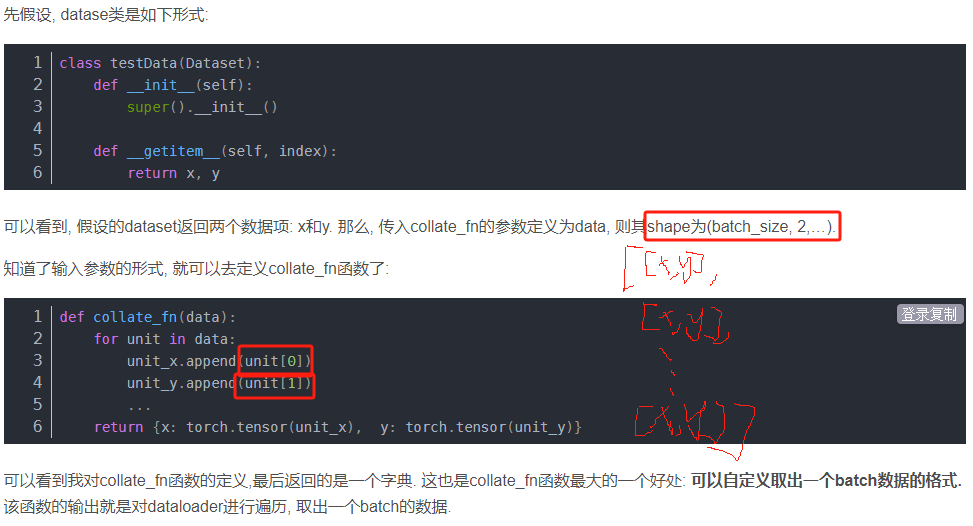
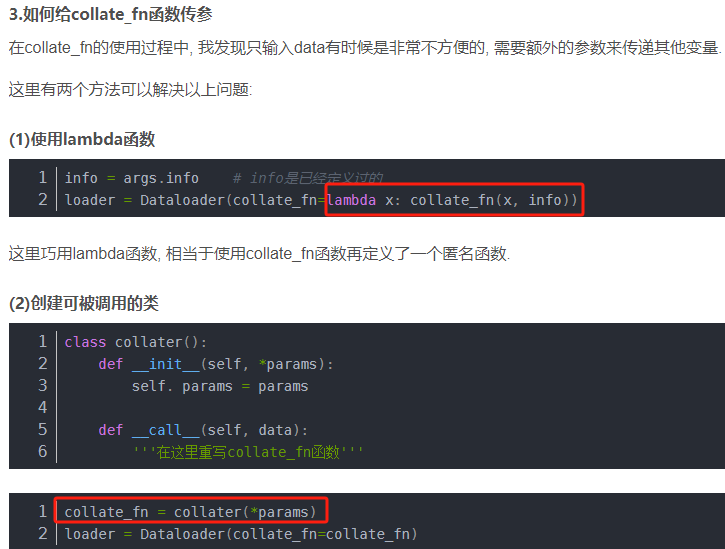
上面使用lambda相当于本质意义上是collate_fn函数，里面包含的collate_fn函数相当于再嵌入一层函数在lambda里面
还可以通过创建一个被调用的类来传递额外的数据，总之collate_fn只能传入一个参数，就是batch，想要想传入其他参数，要么创建类(在初始化类的时候传入参数，要么使用lambda的方式（里面再嵌套一层函数）)

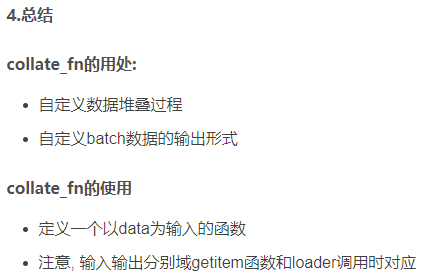